## Analyzing Financial Data with python

Start by installing locally a comprehensive Python installation such as the **Anaconda** Python distribution.

### Necessary Imports

Import the required **modules/packages**

In [170]:
import numpy as np  # for array operations
import pandas as pd  # for time series management
from pandas_datareader import data as web  # for data retrieval
import seaborn as sns; sns.set()  # for a nicer plotting style

# put all plots in the notebook itself
%matplotlib inline

### Retrieving Stock Price Data

In this case, I'm retrieving  **stock price data for American Express Company** using its stock symbol **AXP** from Google Finance.

In [171]:
AXP = web.DataReader('AXP', data_source='google')

#### The "AXP" object is of **type** "DataFrame".

In [172]:
type(AXP)

pandas.core.frame.DataFrame

Get meta information

In [173]:
AXP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1875 entries, 2010-01-04 to 2017-06-14
Data columns (total 5 columns):
Open      1875 non-null float64
High      1875 non-null float64
Low       1875 non-null float64
Close     1875 non-null float64
Volume    1875 non-null int64
dtypes: float64(4), int64(1)
memory usage: 87.9 KB


List the columns in the dataframe

In [174]:
AXP.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume'], dtype='object')

Display the **final five rows** of the data set.

In [175]:
AXP.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-08,79.71,80.20,79.67,79.95,4079817
2017-06-09,80.39,80.73,79.73,80.31,3849413
2017-06-12,80.35,80.73,79.95,80.17,3352279
2017-06-13,80.20,80.74,80.07,80.59,3174361
2017-06-14,80.11,80.92,79.62,80.84,4007069


Easily **select single or multiple columns** of a `DataFrame` object.

.head() shows the first five rows of the selected column

In [176]:
AXP['Close'].head()

Date
2010-01-04    40.92
2010-01-05    40.83
2010-01-06    41.49
2010-01-07    41.98
2010-01-08    41.95
Name: Close, dtype: float64

.tail() here, shows the last five rows of the 2 selected columns

In [177]:
AXP[['Open', 'Close']].tail()

,Open,Close
Date,,
2017-06-08,79.71,79.95
2017-06-09,80.39,80.31
2017-06-12,80.35,80.17
2017-06-13,80.20,80.59
2017-06-14,80.11,80.84


Similarly, a single or multiple rows can be selected

In [178]:
AXP.loc['2017-06-05']  # single row via index value

Open           78.75
High           79.20
Low            78.61
Close          78.97
Volume    2738634.00
Name: 2017-06-05 00:00:00, dtype: float64

In [179]:
AXP.iloc[:2]  # two rows via index numbers

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,40.81,41.10,40.39,40.92,6896366
2010-01-05,40.83,41.23,40.37,40.83,10642158


### Data Visualization

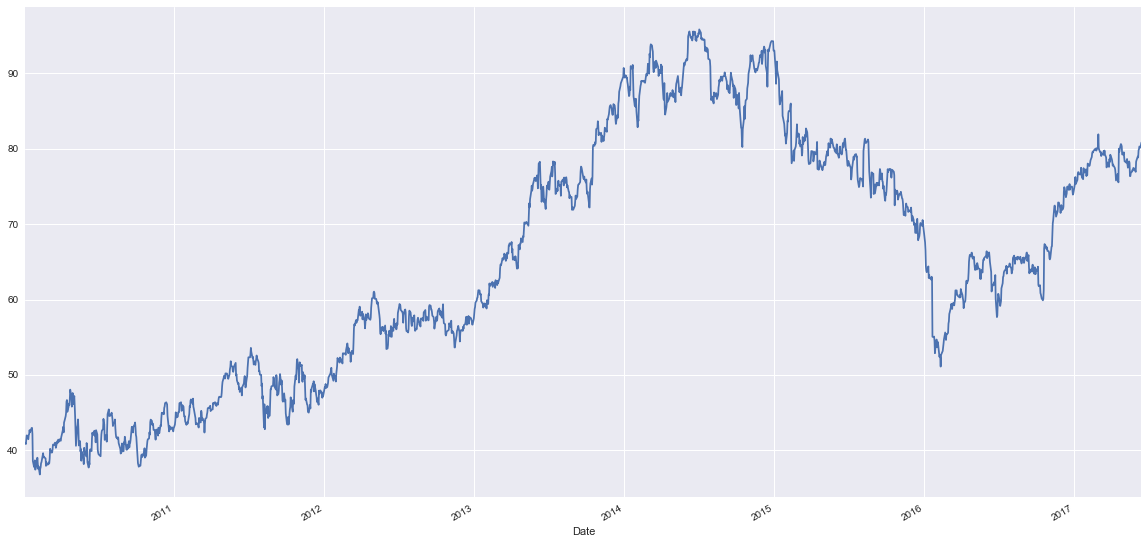

In [180]:
AXP['Close'].plot(figsize=(20, 10));

fully vectorized operation for log return calculation

In [181]:
rets = np.log(AXP['Close'] / AXP['Close'].shift(1))

The log returns can then be visualized via a **histogram**.

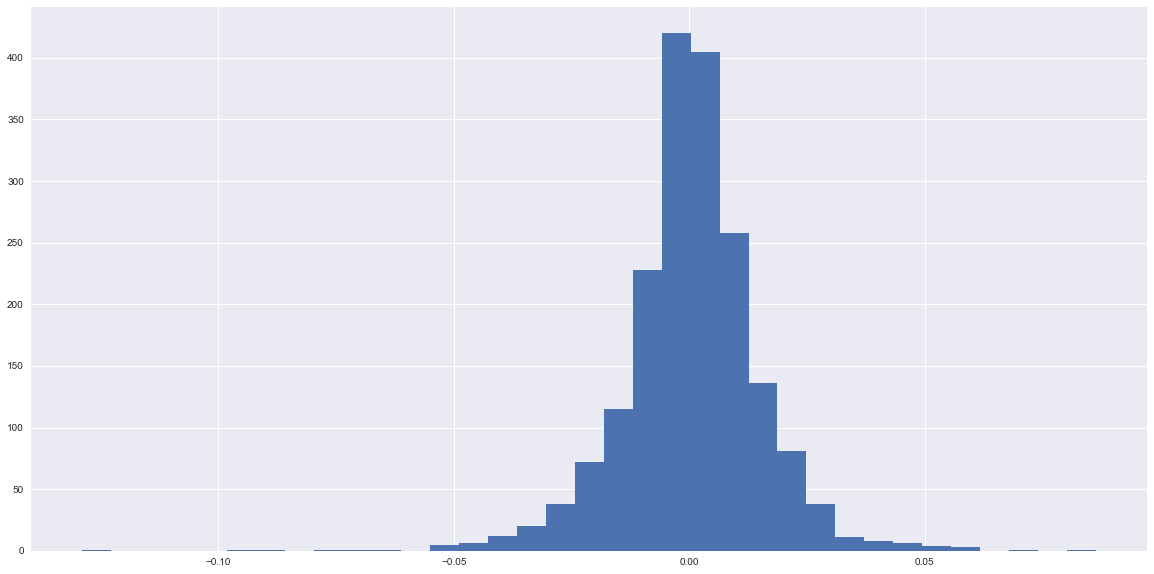

In [182]:
rets.hist(figsize=(20, 10), bins=35);

### Calculating Moving Averages with pandas function

vectorized calculation of 50 days moving average/trend

In [183]:
AXP['MA50'] = pd.rolling_mean(AXP['Close'], window=50)

/Users/sanabasangare/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """Entry point for launching an IPython kernel.


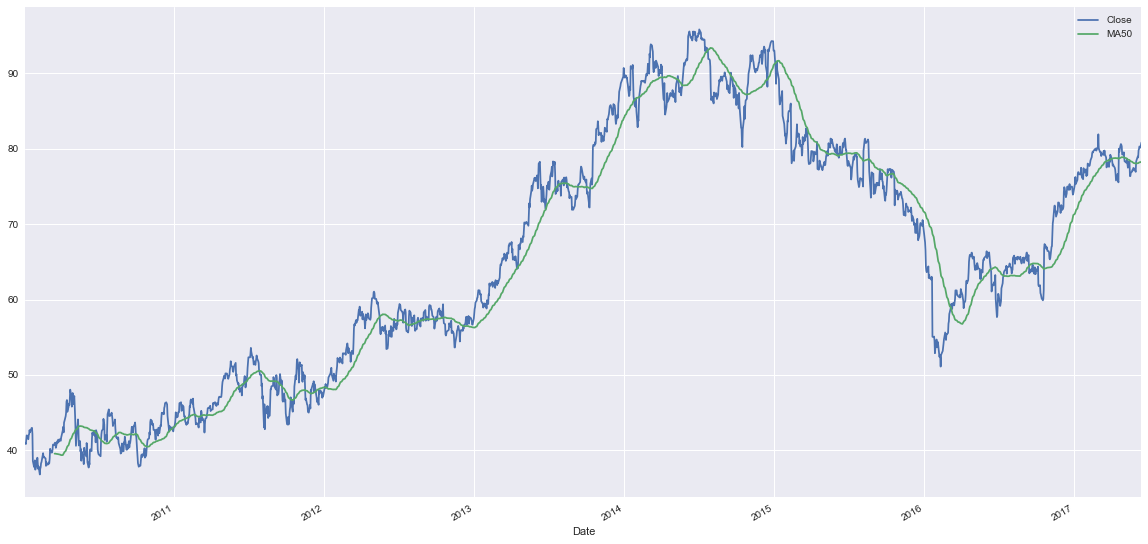

In [184]:
AXP[['Close', 'MA50']].plot(figsize=(20, 10));